In [1]:
import numpy as np
from mnist import MNIST
import matplotlib
matplotlib.use("nbagg")
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import time

In [2]:
# Load input data
mndata = MNIST('./python-mnist/data')
images, labels = mndata.load_training()
X_all = np.array(images)
Y_all = np.array(labels)

<IPython.core.display.Javascript object>


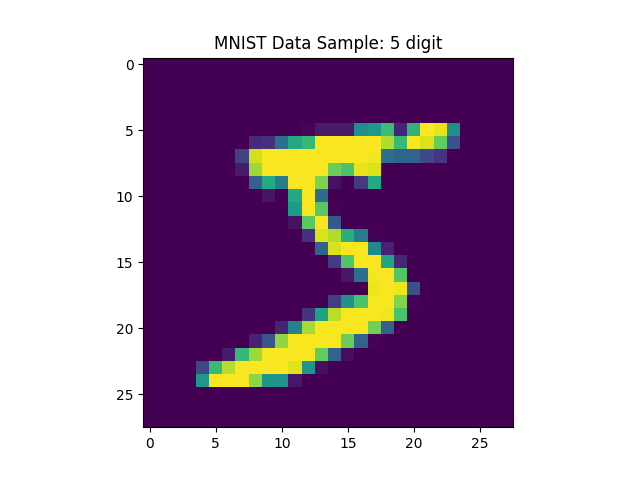

In [3]:
# View sample of data
view = np.array(images[0])
view = np.reshape(view,(28,28))
plt.imshow(view)
plt.title('MNIST Data Sample: %s digit' % labels[0])
plt.show()

<IPython.core.display.Javascript object>


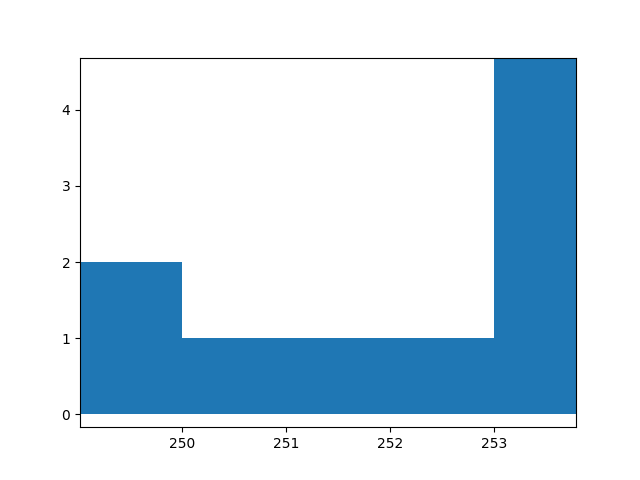

In [5]:
plt.hist(np.array(images[0]), bins=255)
plt.show()

In [6]:
print(view)

[  3  18  18  18 126 136 175  26 166 255 247 127  30  36  94 154 170 253
 253 253 253 253 225 172 253 242 195  64  49 238 253 253 253 253 253 253
 253 253 251  93  82  82  56  39  18 219 253 253 253 253 253 198 182 247
 241  80 156 107 253 253 205  11  43 154  14   1 154 253  90 139 253 190
   2  11 190 253  70  35 241 225 160 108   1  81 240 253 253 119  25  45
 186 253 253 150  27  16  93 252 253 187 249 253 249  64  46 130 183 253
 253 207   2  39 148 229 253 253 253 250 182  24 114 221 253 253 253 253
 201  78  23  66 213 253 253 253 253 198  81   2  18 171 219 253 253 253
 253 195  80   9  55 172 226 253 253 253 253 244 133  11 136 253 253 253
 212 135 132  16]


In [7]:
# Subset Samples for training, validation
np.random.seed(1)

# Map y-labels to 10-vector
mapping = {}
for i in xrange(10):
    mapping[i] = np.insert(np.zeros(9),i,1)
Y_mapped = np.array([mapping[x] for x in Y_all])
    
# For now, choose first 1000 for training, later it's better to choose a random sample
X_train = X_all[0:1000,:].T
Y_train = Y_mapped[0:1000].T

X_validate = X_all[1001:2000,:].T
Y_validate = Y_mapped[1001:2000].T

In [18]:
#Architecture & Hyperparameters
#Going to try a small one to start, 2 hidden layers with 200 units and 100 units respectively
layer_in = 784
layer1 = 200
layer2 = 100
layer_out = 10
alpha = 0.5
error_threshold = 0.05


In [19]:
np.random.seed(1)
#Input -> l1 Weight matrix has to be np.shape = (785, 200) extra bias term
w0 = 2*np.random.random((layer_in + 1, layer1)) - 1
# l1 -> l2 Weight matrix has to be np.shape = (201, 100) extra bias term
w1 = 2*np.random.random((layer1 + 1, layer2)) - 1
#l2 -> Output Weight matrix has to be np.shape = (101, 10) extra bias term
w2 = 2*np.random.random((layer2 + 1, layer_out)) - 1

In [20]:
def sigmoid(x, deriv=False):
    if deriv:
        return x * (1 - x)
    else:
        return 1 / (1 + np.exp(-x))

In [1]:
#Training
tot_error = 1
counter = 1

tstart = time.time()
while (tot_error > error_threshold):
    # forward prop
    # load in input & label
    x0 = np.hstack((np.ones((X_train.shape[1],1)),X_train.T)).T # matrix shape (785, n(examples))
    y = Y_train # matrix shape (10,n)
    N_examples = x0.shape[1]
    
    # propagate forward 
    x1 = np.hstack((np.ones((N_examples,1)), sigmoid(w0.T.dot(x0)).T)).T # vector length 201
    x2 = np.hstack((np.ones((N_examples,1)), sigmoid(w1.T.dot(x1)).T)).T # vector length 101
    x3 = sigmoid(w2.T.dot(x2)) # vector length 10
    
    # backprop
    # calculate errors
    tot_error = sum(sum((x3 - y)**2 / (2 * N_examples)))
    l3_delta = (x3 - y) # matrix shape (10,n)
    l2_delta = sigmoid(x2[1:], True)*w2[1:,:].dot(l3_delta) # matrix shape (100, n)
    l1_delta = sigmoid(x1[1:], True)*w1[1:,:].dot(l2_delta) # matrix shape (200, n)
    
    # calculate gradients
    l3_grad = l3_delta[np.newaxis, :, :] * x2[:, np.newaxis, :] # matrix shape (101, 10, n)
    l2_grad = l2_delta[np.newaxis, :, :] * x1[:, np.newaxis, :] # matrix shape (201, 100, n)
    l1_grad = l1_delta[np.newaxis, :, :] * x0[:, np.newaxis, :] # matrix shape (785, 200, n)
    
    # find total gradient across all examples
    l3_totgrad = np.average(l3_grad, axis=2) # matrix shape (101,10)
    l2_totgrad = np.average(l2_grad, axis=2) # matrix shape (201,100)
    l1_totgrad = np.average(l1_grad, axis=2) # matrix shape (785,200)
    
    # update weights
    w2 += -alpha*l3_totgrad # update weight 2 -> 3
    w1 += -alpha*l2_totgrad # update weight 1 -> 2
    w0 += -alpha*l1_totgrad # update weight 0 -> 1
    
    counter += 1
    if counter % 10 == 0:
        print "Iteration %d, Error: %f" % (counter, tot_error)
        
print "Training to %f error rate took %d seconds." % (error_threshold, time.time()-tstart)

NameError: name 'time' is not defined

In [5]:
# Validation
def validate():
    # forward prop
    # load in input & label
    x0 = np.hstack((np.ones((X_validate.shape[1],1)),X_validate.T)).T # matrix shape (785, n(examples))
    y = Y_validate # matrix shape (10,n)
    N_examples = x0.shape[1]
    
    # propagate forward 
    x1 = np.hstack((np.ones((N_examples,1)), sigmoid(w0.T.dot(x0)).T)).T # vector length 201
    x2 = np.hstack((np.ones((N_examples,1)), sigmoid(w1.T.dot(x1)).T)).T # vector length 101
    x3 = sigmoid(w2.T.dot(x2)) # vector length 10
    
    # calculate errors
    tot_error = sum(sum((x3 - y)**2 / (2 * N_examples)))
    return tot_error
    
def find_labels(x):
    x0 = np.hstack((np.ones((x.shape[0],1)),x)).T # matrix shape (785, n(examples))
    print x0
    N_examples = x0.shape[1]
    
    # propagate forward 
    x1 = np.hstack((np.ones((N_examples,1)), sigmoid(w0.T.dot(x0)).T)).T # vector length 201
    x2 = np.hstack((np.ones((N_examples,1)), sigmoid(w1.T.dot(x1)).T)).T # vector length 101
    x3 = sigmoid(w2.T.dot(x2)) # vector length 10
    
    return np.argmax(x3, axis=0)

In [32]:
xtest = X_all[0:2]
x0 = np.hstack((np.ones((xtest.shape[0],1)),xtest)).T # matrix shape (785, n(examples))


In [23]:
#Load previously computed weights
weights = np.load('./02errorRateWeights.npz')
w0 = weights['w0']
w1 = weights['w1']
w2 = weights['w2']

In [36]:
validate()

/usr/local/Cellar/ipython@5/5.5.0_1/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


0.29621425950333707